In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# In this project we are going to explore the Titanic dataset

The titanic dataset project is about people who have travelled in one of the biggest ship ever built 1912 but unfortunate it was sink to bottom of the sea in it's 1st trip. In this dataset we going to do analysis over dataset based dependent variable who is survived and who is not?

In [5]:
# Lets read the dataset
df = pd.read_csv('data/titanic/train.csv')

In [6]:
# Now see top 5 records and bottom 5 records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
# Now look into the our dataframe using info method to understand about each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


*It gives us total records of each column and dtype of them. Showcase how many columns are present in it with memory usage at bottom...*

## Start with exploratory data analysis

In [9]:
# Understand the data distribution in numerical columns using describe method
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Describe method talks about following points

1. Number of records in individual column
2. Mean value of it
3. Standard deviation
4. Minimum value
5. 25 percentile
6. 50 percentile (median)
7. 75 percentile
8. Maximum value

In [10]:
# Did we have any missing values present in the dataset. Let's find out
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In our records missing values are present in 3 columns which are "Age", "Cabin", "Embarked". Now its our job to find way to fill this missing value or just ignore particular record / delete whole column...

### Handle miss

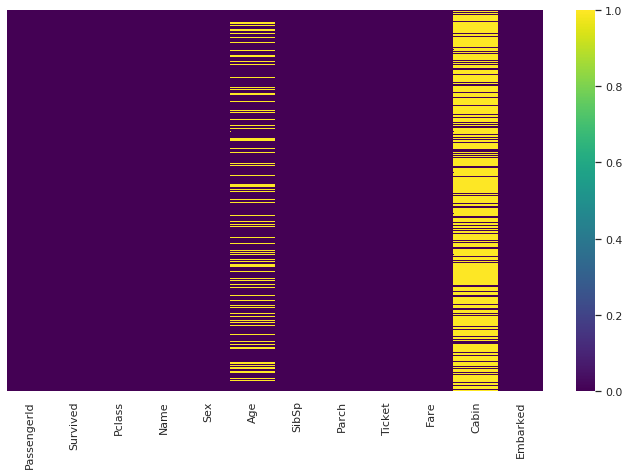

In [37]:
# Heatmap for missing values present in our dataset
plt.figure(figsize=(12, 7))
sns.heatmap(df.isnull(), yticklabels=False, cmap='viridis')

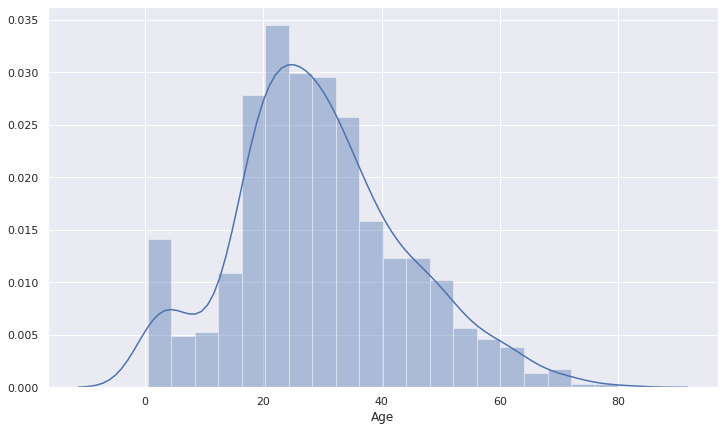

In [38]:
# Let's 1st look into the data distribution of "Age" column
plt.figure(figsize=(12, 7))
sns.distplot(df.loc[~df.Age.isna(), 'Age'])

<ul>
<li>Deviate from the normal distribution.</li>
<li>Have appreciable positive skewness.</li>
</ul>

<Figure size 1080x504 with 0 Axes>

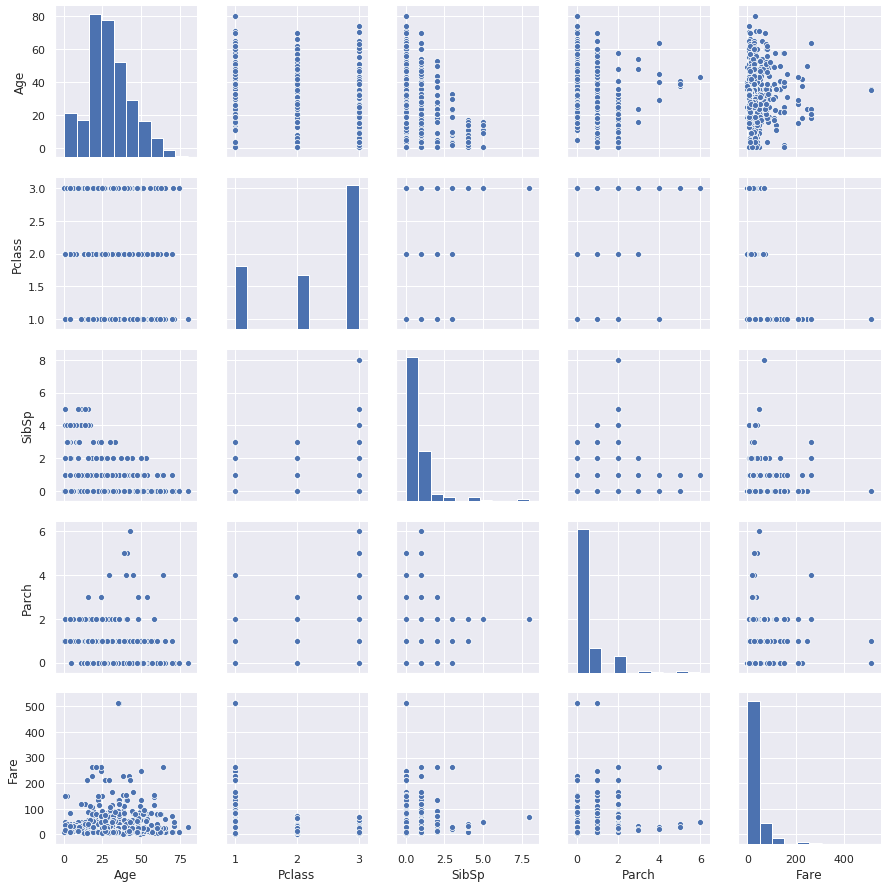

In [45]:
# Find relationship between the columns for "Age" column
plt.figure(figsize=(15, 7))
cols = ['Age', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']
sns.pairplot(df[cols], size = 2.5)

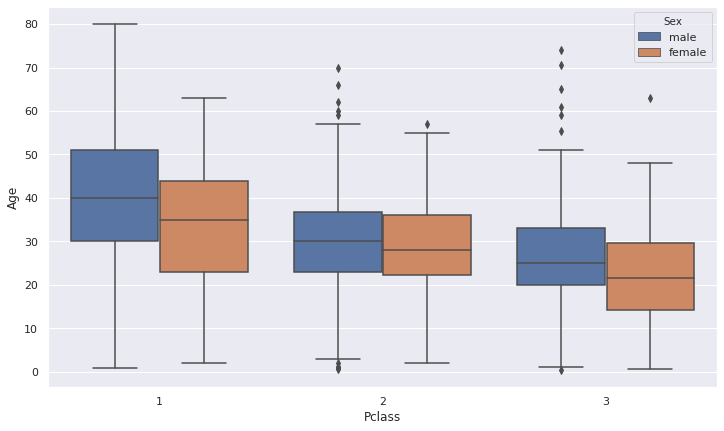

In [29]:
# We can see that their is relationship in "Age" & "Pclass" in above subplot as this is categorical column we are going to use Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x="Pclass", y="Age", hue="Sex", data=df)

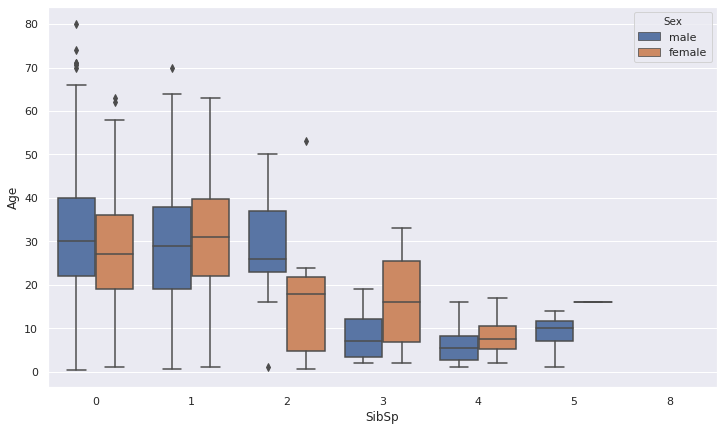

In [33]:
# We can see that their is relationship in "Age" & "SibSp" in above subplot as this is categorical column we are going to use Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x="SibSp", y="Age", hue="Sex", data=df)

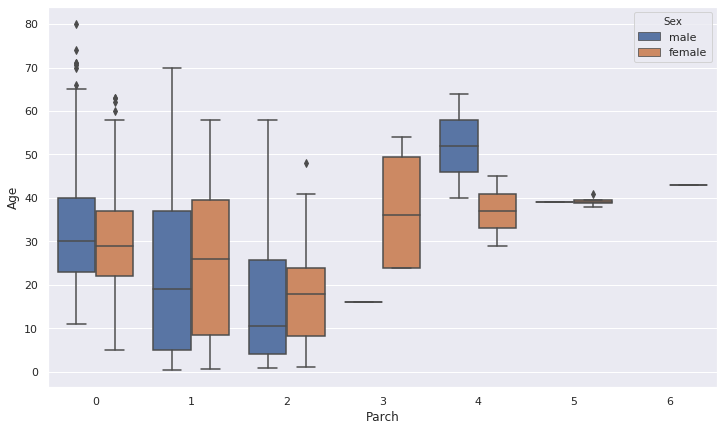

In [32]:
# We can see that their is relationship in "Age" & "Parch" in above subplot as this is categorical column we are going to use Boxplot
plt.figure(figsize=(12, 7))
sns.boxplot(x="Parch", y="Age", hue="Sex", data=df)